# Mathematics Problem Set 6


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
cmap1 = matplotlib.cm.get_cmap('summer')
import scipy.optimize as opt
%matplotlib notebook



### Exercise 8.1

<IPython.core.display.Javascript object>


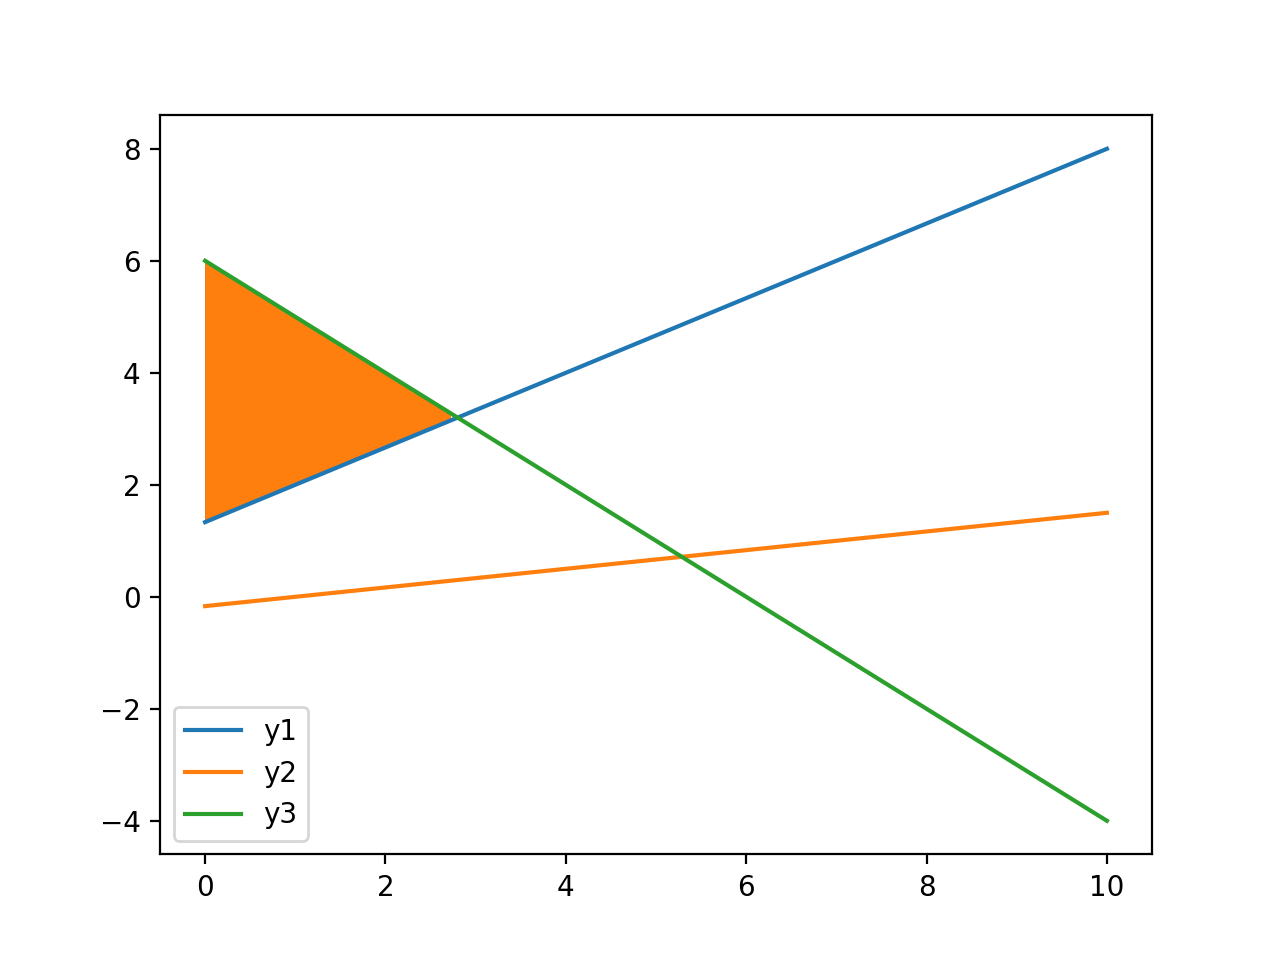

In [107]:
x = np.linspace(0,10,100)

y1 = (2*x + 4)/3 
y2 = (x - 1)/6 
y3 = 6 - x

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend()
plt.show()


In [109]:
plt.fill_between(x, y3, np.maximum(y1, y2), where= y3>=np.maximum(y1, y2))

<IPython.core.display.Javascript object>


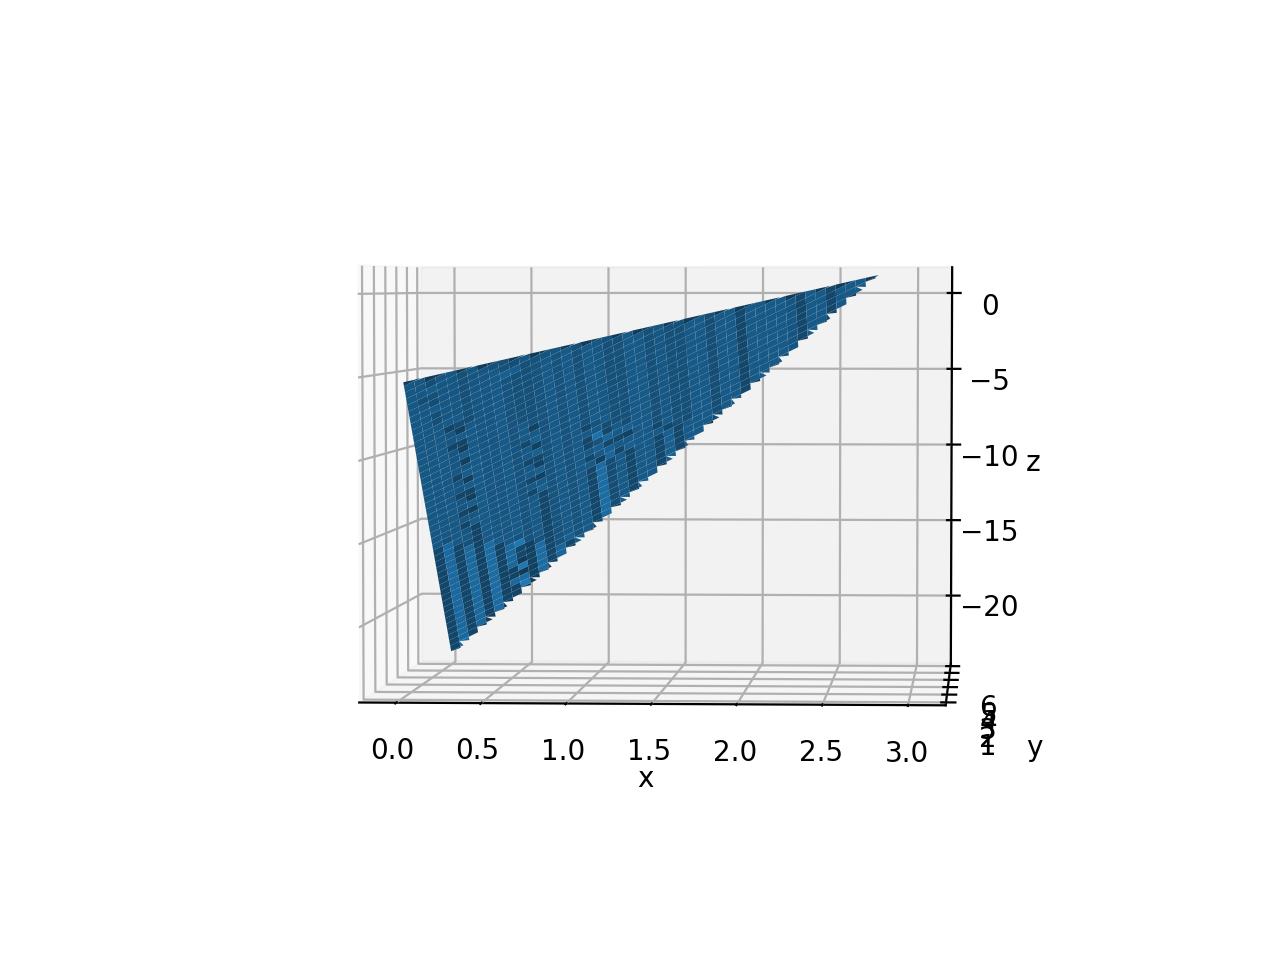

In [133]:
x = np.linspace(0,3,300)
y = np.linspace(1,6,500)
X,Y = np.meshgrid(x,y)
Z = 5*X - 4*Y
Z[(2*X + 4)/3 > Y] = np.nan
Z[6 - X < Y] = np.nan

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

By the Fundamental Theorem, it suffices to check the vertices, and we observe that $(x,y) = (14/5,16/5)$ is the optimizer, with an optimal value of 1.2 .

### Exercise 8.2

### (i)

<IPython.core.display.Javascript object>


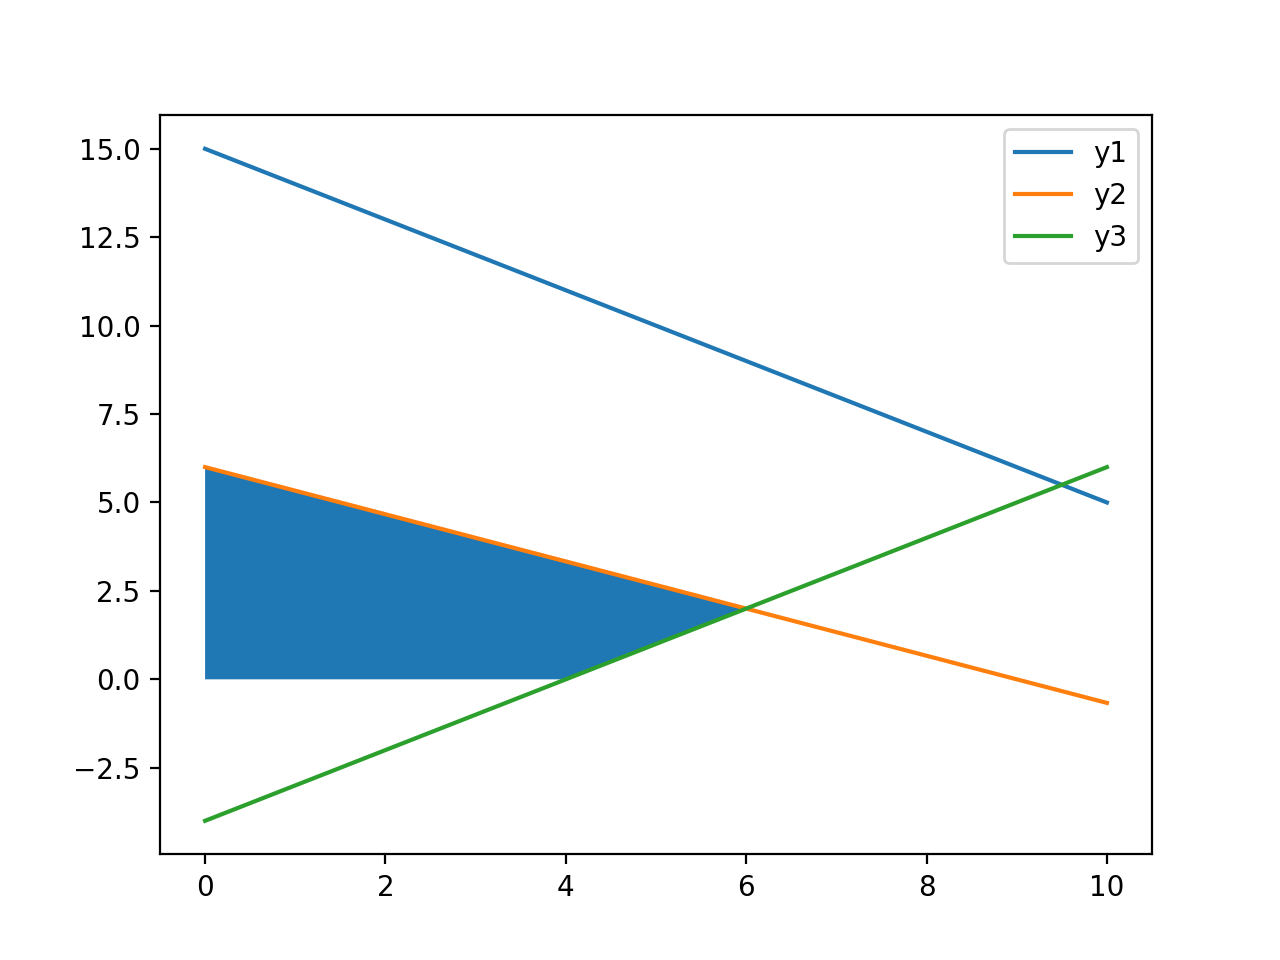

In [135]:
x = np.linspace(0,10,100)
y1 = 15 - x 
y2 = (18 - 2*x)/3 
y3 = x - 4

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend()
plt.show()

In [136]:
yubd = np.minimum(y1, y2)
ylbd = np.maximum(y3, 0)
plt.fill_between(x, yubd, ylbd, where= yubd>=ylbd)

The vertices are (0,0), (4,0), (6,2) and (0,4). The optimal value is reached at (6,2), with and optimal value of 20.

### (ii)

<IPython.core.display.Javascript object>


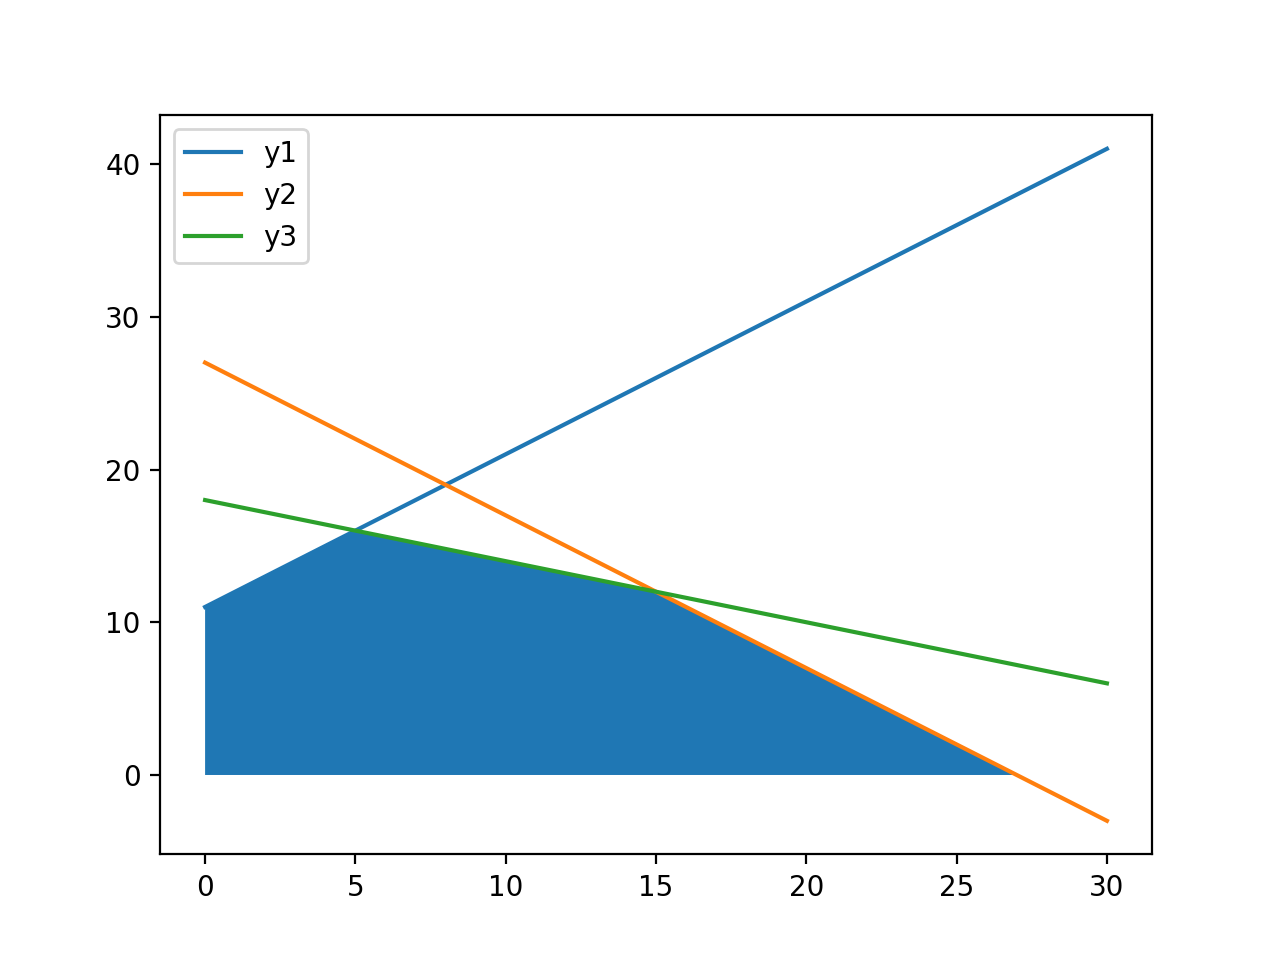

In [137]:
x = np.linspace(0,30,300)
y1 = 11 + x
y2 = 27 - x
y3 = (90 - 2*x)/5

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend()
plt.show()

In [138]:
yubd = np.amin(np.array([y1,y2,y3]), axis = 0)
ylbd = 0
plt.fill_between(x, yubd, ylbd, where= yubd>=ylbd)


The vertices are (0,0), (27,0), (15,12), (5,16) and (0,11). The optimal value is reached at (15,12), with and optimal value of 132.

### Exercise 8.5

In [162]:
class SimplexOpt(object):
    
    def __init__(self, c, A, b):
        n_c = c.shape[0]
        m_A, n_A = A.shape
        m_b = b.shape[0]
        
        self.m = m_A
        self.n = n_A
        # Problem 1
        simplexBool = True
        for i in range(m_b):
            if b[i] < 0:
                #simplexBool = False
                break

        if simplexBool == False:
            raise ValueError("Problem not feasible at the origin.")
        self.A = A
        self.b = np.array(b)
        self.c = np.array(c)
        
        # Problem 2
        varstore = np.zeros((self.n + self.m))
        varstore[:self.m] = b
        self.varstore = varstore
        
        L = np.zeros((self.n + self.m))
        L[:self.m] = np.arange(self.n, self.n+self.m, 1) 
        L[self.m:] = np.arange(0, self.n, 1)
        self.L = L
        
    # Problem 3
    def get_tableau(self):
        m = self.m
        n = self.n
        A = self.A
        b = self.b 
        c = self.c 
        r1 = np.hstack((np.array([0]),-c,np.zeros(m),np.array([1])))
        r2 = np.hstack((b.reshape(m,1),A,np.eye(m),np.zeros((m,1))))
        
        tableau = np.vstack((r1,r2))
        self.tableau = tableau
        return tableau
    
    # Problem 4
    def findPivot(self, tableau):
        
        k = 1
        complete = True
        for i in range(1, tableau.shape[1]):
            
            colentry = tableau[0,i]
            if colentry < 0:
                col = i
                complete = False
                k += 1
                #break
            else:
                pass
            
        if k == tableau.shape[1]:
                raise ValueError("Infeasible!")
        
        if complete == True: 
            return 'complete', 'complete'
        self.col = col
        #print('The column chosen is '+ str(col) + ' since the entry is ' + str(tableau[0,col]))
        
        ctableau = np.copy(tableau)
        for i in range(1, ctableau.shape[0]):
            if ctableau[i, col] <= 0:
                ctableau[i, col] = 0.
        
        ctableau[ctableau<=0] = -1
        '''ratios = np.empty_like(tableau[1:,0]) 
        print(ratios)
        for i in range(len(ratios)):'''
        ratios = tableau[1:,0]/ctableau[1:, col]
        ratios[ratios<=0] = np.inf
        row = np.argmin(ratios) + 1
        self.row = row
        
        #print('The row chosen is '+ str(row) + ' since the ratio is ' + str(ratios[row - 1]))
        #print('The ratio is given by '+ str(tableau[row,0]) + ' divided by ' + str(ctableau[row ,col]))
        return self.row, self.col
    
    # Problem 5
    def checkBoundedness(self, tableau):
        row, col = self.findPivot(tableau)
        for i in range(1, tableau.shape[0]):
            if tableau[i,col] > 0:
                bounded = True
                break
            else: 
                bounded = False
        if bounded == False:
            raise ValueError('Problem unbounded!')
        else:
            print('The problem is well-posed.')
        
    # Problem 6
    def pivot(self):
        
        tableau = np.copy(self.tableau)
        row, col = self.findPivot(self.tableau)
        nbpivot = row - 1
        bpivot = np.where(self.L == col - 1)
        self.L[nbpivot], self.L[bpivot] = self.L[bpivot], self.L[nbpivot]
        
        tableau[row,:] = tableau[row,:]/tableau[row,col]
        
        for i in range(tableau.shape[0]):
            if i == row:
                pass
            else:
                tableau[i,:] -= tableau[i,col] * tableau[row,:]
                
        self.tableau = tableau
        self.col = col
        return self.tableau, self.L, self.col
        
    # Problem 7    
    def solve(self):
        
        tableau = self.get_tableau()
        m, n = tableau.shape
        col = 0
        it = 0

        while col != 'complete' : 
            tableau, L, col = self.pivot()
            
            self.tableau, self.L = tableau, L
            objmax = tableau[0,0]
            m,n = self.A.shape
            bs = dict(zip(L[:m],tableau[1:,0]))
            nbs = dict(zip(L[m:],np.zeros(n).astype(str)))
            print(objmax, bs, nbs)
            row, col = self.findPivot(self.tableau)
            if row == 'complete':
                break
        
    
        
        L = self.L.astype(int)
        tableau = np.round(tableau,4)
        objmax = tableau[0,0]
        m,n = self.A.shape
        bs = dict(zip(L[:m],tableau[1:,0]))
        nbs = dict(zip(L[m:],np.zeros(n).astype(str)))
        return (objmax, bs, nbs)

### (i)

In [154]:
c = np.array([3, 1])
b = np.array([15,18,4])
A = np.array([[1,3], [2, 3], [1, -1]])
LP1 = SimplexOpt(c,A,b)
LP1.checkBoundedness(LP2.get_tableau())
sol = LP1.solve()
sol

The problem is well-posed.
12.0 {2: 11.0, 3: 10.0, 0: 4.0} {4: '0.0', 1: '0.0'}
20.0 {2: 3.0, 1: 2.0, 0: 6.0} {4: '0.0', 3: '0.0'}


(20.0, {0: 6.0, 1: 2.0, 2: 3.0}, {3: '0.0', 4: '0.0'})

### (ii)

In [157]:
c = np.array([4,6])
b = np.array([11,27,90])
A = np.array([[-1,1], [1,1], [2,5]])
LP2 = SimplexOpt(c,A,b)
LP2.checkBoundedness(LP2.get_tableau())
sol = LP2.solve()
sol

The problem is well-posed.
66.0 {1: 11.0, 3: 16.0, 4: 35.0} {0: '0.0', 2: '0.0'}
116.0 {1: 16.0, 3: 6.0, 0: 5.0} {4: '0.0', 2: '0.0'}
132.0 {1: 12.0, 2: 13.999999999999998, 0: 14.999999999999998} {4: '0.0', 3: '0.0'}


(132.0, {0: 15.0, 1: 12.0, 2: 14.0}, {3: '0.0', 4: '0.0'})

Both results are the same with the above.

### Exercise 8.7

### (i)

In [145]:
c = np.array([1,2])
b = np.array([-8,6,3])
A = np.array([[-4,-2], [-2,3], [1,0]])
LP1 = SimplexOpt(c,A,b)
LP1.checkBoundedness(LP2.get_tableau())
sol = LP1.solve()
sol

The problem is well-posed.
3.0 {2.0: 4.0, 3.0: 12.0, 0.0: 3.0} {4.0: '0.0', 1.0: '0.0'}
11.0 {2.0: 12.0, 1.0: 4.0, 0.0: 3.0} {4.0: '0.0', 3.0: '0.0'}


(11.0, {0: 3.0, 1: 4.0, 2: 12.0}, {3: '0.0', 4: '0.0'})

### (ii) 

In [160]:
c = np.array([5,2])
b = np.array([15,15,-12])
A = np.array([[5,3], [3,5],[4,-3]])
LP2 = SimplexOpt(c,A,b)
LP2.checkBoundedness(LP2.get_tableau())
sol = LP2.solve()
sol

ValueError: Infeasible!

The problem is infeasible.

### (iii)

In [89]:
c = np.array([-3,1])
b = np.array([4,6])
A = np.array([[0,1], [-2,3]])
LP3 = SimplexOpt(c,A,b)
sol = LP3.solve()
sol


2.0 {2.0: 2.0, 1.0: 2.0} {0.0: '0.0', 3.0: '0.0'}


(2.0, {1: 2.0, 2: 2.0}, {0: '0.0', 3: '0.0'})

### Exercise 8.13

Note that the origin in the problem is a feasible point and a vertex. Take any nonbasic variable to start. Note that since b = 0, the slack variables can either not be decreased (positive coefficient), or increased infinitely in fixed proportion to the nonbasic variable. Hence either 0 is optimal, or the problem is unbounded.

### Exercise 8.15

We have $c^T x = x^T c \le x^T A^T y = y^T A x \le y^T b$, where the inequalities follow from the dual and primary problem, respectively. $\square$


### Exercise 8.17

Let 
$$ \text{maximize} \quad c^T x$$
$$ \text{subject to } Ax \le b$$
$$ \qquad \qquad x \ge 0$$
be the primary LP.

It's dual is given by:


$$ \text{minimize} \quad b^T y$$
$$ \text{subject to } A^T y \ge c$$
$$ \qquad \qquad y \ge 0$$

We can rewrite this as a maximization problem:


$$ \text{maximize} \quad  -b^T y$$
$$ \text{subject to } -A^T y \le -c$$
$$ \qquad \qquad y \ge 0$$

which then in turn has the dual:

$$ \text{minimize} \quad -c^T x$$
$$ \text{subject to } - Ax \ge -b$$
$$ \qquad \qquad x \ge 0$$

which is exactly the primary problem formulated as a minimization.


### Exercise 8.18

In [163]:
c = np.array([1,1])
b = np.array([3,5,4])
A = np.array([[2,1], [1,3],[2,3]])
opt.linprog(-c,A_ub=A,b_ub=b)


     fun: -1.75
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.  ,  2.25,  0.  ])
  status: 0
 success: True
       x: array([ 1.25,  0.5 ])

In [164]:

c = np.array([-3,-5,-4])
b = np.array([-1,-1])
A = np.array([[-2,-1,-2],[-1,-3,-3]])
opt.linprog(-c,A_ub=A,b_ub=b)


     fun: 1.75
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0.])
  status: 0
 success: True
       x: array([ 0.25,  0.  ,  0.25])

Substituting the x(y)-values of the dual problem into the original one, we can see that they are equivalent solutions.

### Exercise 9.3

We leave this exercise to the book, or to verbal communication.

### Exercise 9.6

In [181]:
def stdescent(Q, b, x_0, tol=1e-8, maxiters=200):
    dist = 1
    k = 1
    while k < maxiters and dist > tol:
    #for k in range(maxiters):
        Df = Q@x_0 - b
        dist = np.linalg.norm(Df)
        alpha = Df.T@Df/((Df.T@Q)@Df)
        x_1 = x_0-alpha*Df
        #dist = np.linalg.norm(x_1 - x_0)
        x_0=x_1
    if k < maxiters:
        print("The method led to convergence.")
    return x_0

In [185]:
Q = np.array([[3,-1],[-1,3]])
b = np.array([2,1])
x0 = np.array([1,1])

stdescent(Q, b, x0)


The method led to convergence.


array([ 0.875,  0.625])

### Exercise 9.7

In [204]:
def Dff(f, x_0, Rerr):
    m = f(x_0).shape
    n = x_0.shape[0]
    
    if len(m)==0:
        m = 1
    
    Df = np.zeros((m,n))
    h = 2*np.sqrt(Rerr)
    
    for i in range(n):
        ei = np.zeros(n)
        ei[i] = 1
        Df[:,i] = (f(x_0 + h*ei) - f(x_0))*(1/h)
    return Df

In [205]:
f = lambda x: 0.5*x@(Q@x) - b@x + 3 
Dff(f,x0,1e-12)

array([[  3.00004466e-06,   1.00000300e+00]])

In [192]:
print(Q@x0-b)

[0 1]


The approximation is decent.

### Exercise 9.10

We have $Df = Qx - b$, $D^2f = Q$. Take any $x_0$ as a starting point. We have $$x_1 = x_0 - Q^{-1}Df(x_0) = x_0 - Q^{-1}(Qx_0 - b) = Q^{-1}b .$$ Now note that $0 = Df = Qx - b$ is optimality condition, so $x_1$ is optimal. $\square$
